# Data exploration and tidy data

### Objectives
* Tidy data, from theory to practice
* Clean, tidy and preprocess the data

### Notes
* Online course resource in R [link](https://rmagno.eu/tdvr.oct.22/).



In [1]:
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')
#!mkdir /content/drive/MyDrive/Tidy_Python_2025
gdrive_path = "/content/drive/MyDrive/Tidy_Python_2025/"
%cd $gdrive_path

Mounted at /content/drive
/content/drive/MyDrive/Tidy_Python_2025


## 1. Data loading

In [3]:
data_raw_path = gdrive_path+'2025-tidy-python/r2py/raw-data-python/'

In [4]:
!ls

2025-tidy-python  data_tidy_path


In [5]:
# quadrats01 <- readxl::read_excel(file.path(data_raw_path, "quadrats.xlsx"))
quadrats01  = pd.read_excel(os.path.join(data_raw_path, 'quadrats.xlsx'))
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


In [7]:
# df1_q1 <- readr::read_csv(file.path(data_raw_path, "2020-01-02_q1.csv"))
df1_ra = pd.read_csv(os.path.join(data_raw_path, '2020-01-02_ra.csv')).reset_index(drop=True)
# df1_rf <- readr::read_csv(file.path(data_raw_path, "2020-01-02_rf.csv"))
df1_rf = pd.read_csv(os.path.join(data_raw_path, '2020-01-02_rf.csv')).reset_index(drop=True)
df1_ra.head()

,Unnamed: 0,species_name,sex,stage,is_gravid?,behavior,associated_species,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],fw [cm],date,latitude,longitude,id
0,0,u. olhanen.,female,j,False,Collecting biofilm from sunken wood.,"['Sea Sponge', 'Shrimp', 'Sea Star']",7.0,0.672986,0.749001,0.969131,0.715282,3.454545,2020-01-02,37.1,-8.62,0
1,1,A farensis,male or female,s,NaN,Side-stepping along sandy coastal floor.,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",9.0,3.522727,3.176997,4.634476,3.790048,3.454545,2020-01-02,NaN,NaN,1
2,2,u. olhanen.,N/R,s,NaN,Guarding eggs beneath body flap.,['Snail'],11.0,0.568182,0.591866,0.748647,0.618259,3.727273,2020-01-02,NaN,NaN,2
3,3,u. olhanen.,male,a,NaN,Swiftly dashing across exposed sand.,"['Sea Urchin', 'Polychaete Worm']",7.0,3.272727,3.426632,4.336083,3.471059,3.727273,2020-01-02,NaN,NaN,3
4,4,u. olhanen.,female,a,False,Gradual movement in cold conditions.,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",3.0,3.315087,3.126850,4.384256,3.536922,3.636364,2020-01-02,NaN,NaN,4


## 2. Tidy data theory
- following the R [tutorial](https://r4ds.had.co.nz/tidy-data.html) so you have a direct correspondance between R and python

### Tuberculosis example tables

In [8]:
table1 = pd.DataFrame(
    {
    "country": ["Afghanistan", "Afghanistan", "Brazil", "Brazil", "China", "China"],
    "year": [1999, 2000, 1999, 2000, 1999, 2000],
    "cases": [745, 2666, 37737, 80488, 212258, 213766],
    "population": [19987071, 20595360, 172006362, 174504898, 1272915272, 1280428583]
    }
)
table1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [9]:
table2 = pd.DataFrame(
    {
    "country": ["Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan",
                "Brazil", "Brazil", "Brazil", "Brazil",
                "China", "China", "China", "China"],
    "year": [1999, 1999, 2000, 2000,
             1999, 1999, 2000, 2000,
             1999, 1999, 2000, 2000],
    "type": ["cases", "population", "cases", "population",
             "cases", "population", "cases", "population",
             "cases", "population", "cases", "population"],
    "count": [745, 19987071, 2666, 20595360,
              37737, 172006362, 80488, 174504898,
              212258, 1272915272, 213766, 1280428583]
    },
)
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [10]:
data = {
    "country": ["Afghanistan", "Afghanistan", "Brazil", "Brazil", "China", "China"],
    "year": [1999, 2000, 1999, 2000, 1999, 2000],
    "cases": [745, 2666, 37737, 80488, 212258, 213766],
    "population": [19987071, 20595360, 172006362, 174504898, 1272915272, 1280428583]
}

table3 = pd.DataFrame(data)
table3["rate"] = table3["cases"].astype(str) + "/" + table3["population"].astype(str)
table3 = table3[["country", "year", "rate"]]

table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [11]:
# Cases
table4a = pd.DataFrame({
    "country": ["Afghanistan", "Brazil", "China"],
    "1999": [745, 37737, 212258],
    "2000": [2666, 80488, 213766]
})

# Population
table4b = pd.DataFrame({
    "country": ["Afghanistan", "Brazil", "China"],
    "1999": [19987071, 172006362, 1272915272],
    "2000": [20595360, 174504898, 1280428583]
})

table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [12]:
table4b

,country,1999,2000
0,Afghanistan,19987071,20595360
1,Brazil,172006362,174504898
2,China,1272915272,1280428583


There are three interrelated rules which make a dataset tidy:

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.


### **Exercise**: Calculate new column
To appreciate good practices, calculate rate of cases per 10000. Which of the tables is the `tidy` one?

In [13]:
table1['rate'] = table1['cases'] / table1['population'] * 10000
table1

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Afghanistan,2000,2666,20595360,1.294466
2,Brazil,1999,37737,172006362,2.193930
3,Brazil,2000,80488,174504898,4.612363
4,China,1999,212258,1272915272,1.667495
5,China,2000,213766,1280428583,1.669488


**Table 2**

In [14]:
cases = table2[table2['type'] == 'cases'].copy().reset_index(drop=True)
population = table2[table2['type'] == 'population'].copy().reset_index(drop=True)

rate = cases['count'] / population['count'] * 10000

In [15]:
# I have rate but lost correspondance to the original table country and year values. Cannot easily merge.
rate

,count
0,0.372741
1,1.294466
2,2.193930
3,4.612363
4,1.667495
5,1.669488


Proper solution, pivot table2 to arrive at table1

In [16]:
pivoted = table2.pivot(
    index=["country", "year"], columns="type", values="count",
).reset_index()

pivoted

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


**Table 3**

In [17]:
table3['rate_numeric'] = table3['rate'].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) * 10000)
table3

,country,year,rate,rate_numeric
0,Afghanistan,1999,745/19987071,0.372741
1,Afghanistan,2000,2666/20595360,1.294466
2,Brazil,1999,37737/172006362,2.193930
3,Brazil,2000,80488/174504898,4.612363
4,China,1999,212258/1272915272,1.667495
5,China,2000,213766/1280428583,1.669488


Probably, I want to keep the cases and population

In [18]:
table3[['cases', 'population']] = table3['rate'].str.split('/', expand=True).astype(int)
table3.drop(columns=['rate_numeric'], inplace=True)
table3['rate'] = table3['cases'] / table3['population'] * 10000
table3

# table3['rate_numeric'] = table3['rate'].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) * 10000)

,country,year,rate,cases,population
0,Afghanistan,1999,0.372741,745,19987071
1,Afghanistan,2000,1.294466,2666,20595360
2,Brazil,1999,2.193930,37737,172006362
3,Brazil,2000,4.612363,80488,174504898
4,China,1999,1.667495,212258,1272915272
5,China,2000,1.669488,213766,1280428583


**Table 4**

In [19]:
table4a_sol = table4a.melt(id_vars=['country'], var_name='year', value_name='cases')
table4a_sol

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


In [20]:
table4b_sol = table4b.melt(id_vars=['country'], var_name='year', value_name='population')
table4b_sol

,country,year,population
0,Afghanistan,1999,19987071
1,Brazil,1999,172006362
2,China,1999,1272915272
3,Afghanistan,2000,20595360
4,Brazil,2000,174504898
5,China,2000,1280428583


In [21]:
table4 = pd.merge(table4a_sol, table4b_sol, on=['country', 'year'])
table4['rate'] = table4['cases'] / table4['population'] * 10000
table4

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Brazil,1999,37737,172006362,2.193930
2,China,1999,212258,1272915272,1.667495
3,Afghanistan,2000,2666,20595360,1.294466
4,Brazil,2000,80488,174504898,4.612363
5,China,2000,213766,1280428583,1.669488


In [22]:
table4a_sol.set_index(['country', 'year'], inplace=True)
table4b_sol.set_index(['country', 'year'], inplace=True)

In [ ]:
pd.concat([table4a_sol, table4b_sol], axis=1)

,,cases,population
country,year,,
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


In [23]:
table4b = table4.set_index(['country', 'year'])
table4b

,,cases,population,rate
country,year,,,
Afghanistan,1999,745,19987071,0.372741
Brazil,1999,37737,172006362,2.193930
China,1999,212258,1272915272,1.667495
Afghanistan,2000,2666,20595360,1.294466
Brazil,2000,80488,174504898,4.612363
China,2000,213766,1280428583,1.669488


In [24]:
df = table4b.stack()
df

country      year            
Afghanistan  1999  cases         7.450000e+02
                   population    1.998707e+07
                   rate          3.727410e-01
Brazil       1999  cases         3.773700e+04
                   population    1.720064e+08
                   rate          2.193930e+00
China        1999  cases         2.122580e+05
                   population    1.272915e+09
                   rate          1.667495e+00
Afghanistan  2000  cases         2.666000e+03
                   population    2.059536e+07
                   rate          1.294466e+00
Brazil       2000  cases         8.048800e+04
                   population    1.745049e+08
                   rate          4.612363e+00
China        2000  cases         2.137660e+05
                   population    1.280429e+09
                   rate          1.669488e+00
dtype: float64

In [25]:
df.reset_index(level=0).reset_index(level=0)

,year,country,0
cases,1999,Afghanistan,7.450000e+02
population,1999,Afghanistan,1.998707e+07
rate,1999,Afghanistan,3.727410e-01
cases,1999,Brazil,3.773700e+04
population,1999,Brazil,1.720064e+08
rate,1999,Brazil,2.193930e+00
cases,1999,China,2.122580e+05
population,1999,China,1.272915e+09
rate,1999,China,1.667495e+00
cases,2000,Afghanistan,2.666000e+03


## 3. Data tidying
- First we compare tables from R. Formosa and R. Alvor to identify inconsistencies
- based on that, we preclean all dataframes and concatenate them
- Then tidying will continue, but on single table, things might be easier

### Exercise: remove columns
- remove the "Unnamed: 0" column
- try to get to the solution using gemini with different inputs, less specific to more specific

In [26]:
#@title Solution

df1_ra = df1_ra.drop('Unnamed: 0', axis=1)

In [27]:
df1_ra.head()

,species_name,sex,stage,is_gravid?,behavior,associated_species,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],fw [cm],date,latitude,longitude,id
0,u. olhanen.,female,j,False,Collecting biofilm from sunken wood.,"['Sea Sponge', 'Shrimp', 'Sea Star']",7.0,0.672986,0.749001,0.969131,0.715282,3.454545,2020-01-02,37.1,-8.62,0
1,A farensis,male or female,s,NaN,Side-stepping along sandy coastal floor.,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",9.0,3.522727,3.176997,4.634476,3.790048,3.454545,2020-01-02,NaN,NaN,1
2,u. olhanen.,N/R,s,NaN,Guarding eggs beneath body flap.,['Snail'],11.0,0.568182,0.591866,0.748647,0.618259,3.727273,2020-01-02,NaN,NaN,2
3,u. olhanen.,male,a,NaN,Swiftly dashing across exposed sand.,"['Sea Urchin', 'Polychaete Worm']",7.0,3.272727,3.426632,4.336083,3.471059,3.727273,2020-01-02,NaN,NaN,3
4,u. olhanen.,female,a,False,Gradual movement in cold conditions.,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",3.0,3.315087,3.126850,4.384256,3.536922,3.636364,2020-01-02,NaN,NaN,4


### Encode values
- region and date information comes from the filename
- we want it in the table

In [28]:
# add region, and date
df1_ra['region'] = "Ria Alvor"
df1_ra['date'] = "2020-01-05"

df1_rf['region'] = "Ria Formosa"
df1_rf['date'] = "2020-01-05"

In [29]:
df1_ra['date']

,date
0,2020-01-05
1,2020-01-05
2,2020-01-05
3,2020-01-05
4,2020-01-05
...,...
294,2020-01-05
295,2020-01-05
296,2020-01-05
297,2020-01-05


### `datetime`

In [30]:
#@title motivation
dates = ['2020-01-05', '2023-06-25']

In [31]:
# calculate how many days passed between those two dates?
from datetime import datetime, date


d = [datetime.strptime(date, "%Y-%m-%d") for date in dates]
d

[datetime.datetime(2020, 1, 5, 0, 0), datetime.datetime(2023, 6, 25, 0, 0)]

In [32]:
date(2025, 6, 25)

datetime.date(2025, 6, 25)

In [33]:
dt = d[1] - d[0]
dt

datetime.timedelta(days=1267)

In [34]:
df1_ra.loc[0, 'date']

'2020-01-05'

In [35]:
datetime.now()

datetime.datetime(2025, 7, 1, 20, 54, 45, 226446)

In [36]:
help(datetime.now)

Help on built-in function now:

now(tz=None) class method of datetime.datetime
    Returns new datetime object representing current time local to tz.
    
      tz
        Timezone object.
    
    If no tz is specified, uses local timezone.



In [37]:
#@title Why does it not work?
datetime.now() - df1_ra.loc[0, 'date']

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'str'

In [38]:
#@title Works, but cumbersome

datetime.now() - datetime.strptime(df1_ra.loc[0, 'date'], "%Y-%m-%d")

datetime.timedelta(days=2004, seconds=75286, microseconds=710010)

#### **Exercise**: convert date to `datetime`

In [39]:
#@title Solution

df1_ra['date'] = pd.to_datetime(df1_ra['date'])
df1_rf['date'] = pd.to_datetime(df1_rf['date'])

In [40]:
df1_ra['date']

,date
0,2020-01-05
1,2020-01-05
2,2020-01-05
3,2020-01-05
4,2020-01-05
...,...
294,2020-01-05
295,2020-01-05
296,2020-01-05
297,2020-01-05


The values look the same, however the type is different.

In [41]:
df1_ra['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 299 entries, 0 to 298
Series name: date
Non-Null Count  Dtype         
--------------  -----         
299 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 KB


The `dtypes: datetime64[ns]`line shows that the `date` column has now the correct type.

### Cleaning the column names
- before merging tables, we need to make sure that columns match and have compatible values
- **For example, simple space after a column name can be easily missed** (should I include it in the DS?)


In [42]:
#@title Check if the oclumns match between datasets

# columns only in df1_ra
set(df1_ra.columns) - set(df1_rf.columns)

{'behavior',
 'cl [cm]',
 'cw [cm]',
 'fw [cm]',
 'is_gravid?',
 'lcl [cm]',
 'rcl [cm]',
 'species_name'}

In [43]:
# symmatric difference "^" shows all elements that are only on one of the two sets
set(df1_ra.columns) ^ set(df1_rf.columns)

{'Unnamed: 0',
 'behavior',
 'behaviour',
 'cl [cm]',
 'cl [mm]',
 'cw [cm]',
 'cw [mm]',
 'fw [cm]',
 'fw [mm]',
 'is_gravid',
 'is_gravid?',
 'lcl [cm]',
 'lcl [mm]',
 'rcl [cm]',
 'rcl [mm]',
 'species',
 'species_name'}

From the comparisons, it is obvious that:

*   labels for species name are diffent
*   measurements are in cm in one data set and mm in the other
*   "behaviour" and "behavio" spellings (UK vs US) must be standardized
*   "is_gravid" and "is_gravid?" must be identica (remove the "?")
set(df1_ra.columns) ^ set(df1_rf.columns)

**Recommended way to check correctness:**
- use `assert` statements everywhere you can
- the idea is to assert outputs, otherwise raise error

In [44]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) ^ set(df1_rf.columns)}"

AssertionError: Column names do not match {'behaviour', 'rcl [cm]', 'fw [cm]', 'cw [mm]', 'Unnamed: 0', 'cw [cm]', 'species', 'rcl [mm]', 'lcl [cm]', 'behavior', 'lcl [mm]', 'cl [cm]', 'cl [mm]', 'is_gravid?', 'species_name', 'is_gravid', 'fw [mm]'}

Exercise: fix the column names

In [45]:
df1_ra.columns, df1_rf.columns

(Index(['species_name', 'sex', 'stage', 'is_gravid?', 'behavior',
        'associated_species', 'depth [m]', 'cl [cm]', 'cw [cm]', 'lcl [cm]',
        'rcl [cm]', 'fw [cm]', 'date', 'latitude', 'longitude', 'id', 'region'],
       dtype='object'),
 Index(['Unnamed: 0', 'species', 'sex', 'stage', 'is_gravid', 'behaviour',
        'associated_species', 'depth [m]', 'cl [mm]', 'cw [mm]', 'lcl [mm]',
        'rcl [mm]', 'fw [mm]', 'date', 'latitude', 'longitude', 'id', 'region'],
       dtype='object'))

**Exercise**: Plot histograms between mm and cm columns to see if the labels are actually correct

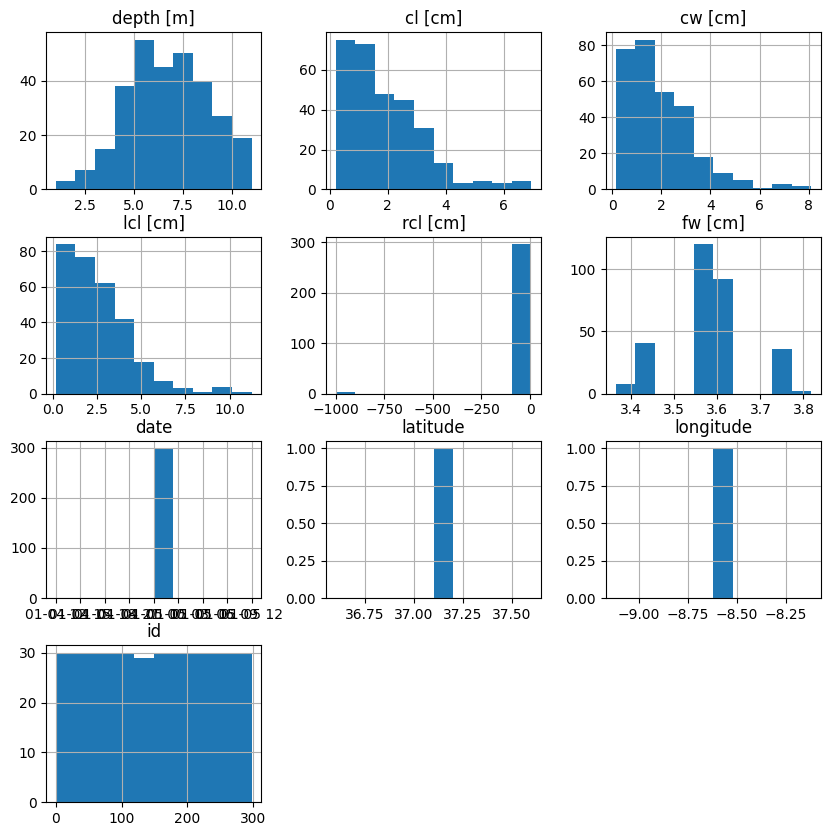

In [46]:
#@title Solution

df1_ra.hist(figsize=(10, 10))
plt.show()

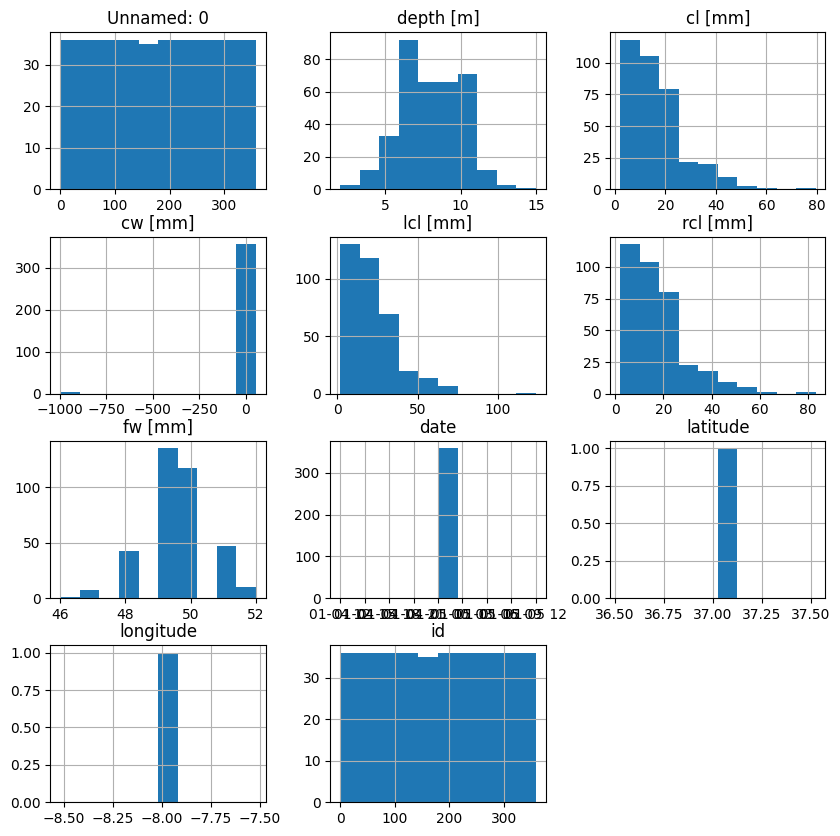

In [47]:
df1_rf.hist(figsize=(10, 10))
plt.show()

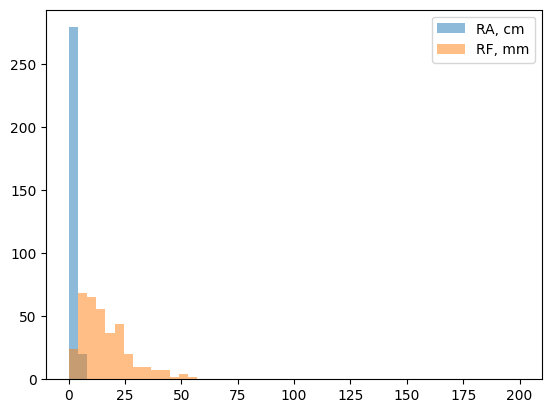

In [49]:
#@title Combined histogram for single feature

bins = np.linspace(0, 200, 50)
plt.hist(df1_ra['cw [cm]'], bins=bins, alpha=0.5, label='RA, cm')
plt.hist(df1_rf['cw [mm]'], bins=bins, alpha=0.5, label='RF, mm')
plt.legend()
plt.show()

Standardizing feature names:

In [50]:
df1_rf['region'] = "Ria Formosa"
df1_ra.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)

In [51]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) ^ set(df1_rf.columns)}"

AssertionError: Column names do not match {'rcl [cm]', 'fw [cm]', 'cw [mm]', 'Unnamed: 0', 'cw [cm]', 'rcl [mm]', 'lcl [cm]', 'lcl [mm]', 'cl [cm]', 'cl [mm]', 'fw [mm]'}

Do you want to work in cm or mm for the rest of your project?


#### **Exercise:** if a column contains string '[mm]' divide it by 10 and rename it accordingly.

In [57]:
#@title Solution

for col in df1_rf.columns:
    if '[mm]' in col:
        df1_rf[col] = df1_rf[col] / 10
        df1_rf.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

In [58]:
#@title Alternative solution
# Identify columns with '[mm]' in their names
df = df1_rf.copy()
mm_columns = [col for col in df.columns if '[mm]' in col]

# Convert values from mm to cm (divide by 10)
df[mm_columns] = df[mm_columns] / 10

# Rename columns to replace '[mm]' with '[cm]'
df.rename(columns={col: col.replace('[mm]', '[cm]') for col in mm_columns}, inplace=True)

In [59]:
# need to use symmetric differnce here, or the set difference will output the null set
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) ^ set(df1_rf.columns)}"

In [55]:
df1_rf = df1_rf.drop('Unnamed: 0', axis=1)

In [60]:
assert set(df1_ra.columns) == set(df1_rf.columns), f"Column names do not match {set(df1_ra.columns) - set(df1_rf.columns)}"

**Finally, all the columns are consistent (for 2 tables only, though!!!)**

### Rename abbreviated columns
- They do not make sense to your student or a reviewer.

In [61]:
# df1_ra <- dplyr::rename(df1_ra, carapace_width = cw, carapace_length = cl, left_claw_length = lcl, right_claw_length = rcl, front_width = fw)

# Here I do it inplace to save code and space
df1_ra.rename(
    columns={
        "cw [cm]": "carapace_width",
        "cl [cm]": "carapace_length",
        "lcl [cm]": "left_claw_length",
        "rcl [cm]": "right_claw_length",
        'fw [cm]': 'front_width'},
    inplace=True,
)

In [62]:
df1_ra.head()

,species,sex,stage,is_gravid,behaviour,associated_species,depth [m],carapace_length,carapace_width,left_claw_length,right_claw_length,front_width,date,latitude,longitude,id,region
0,u. olhanen.,female,j,False,Collecting biofilm from sunken wood.,"['Sea Sponge', 'Shrimp', 'Sea Star']",7.0,0.672986,0.749001,0.969131,0.715282,3.454545,2020-01-05,37.1,-8.62,0,Ria Alvor
1,A farensis,male or female,s,NaN,Side-stepping along sandy coastal floor.,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",9.0,3.522727,3.176997,4.634476,3.790048,3.454545,2020-01-05,NaN,NaN,1,Ria Alvor
2,u. olhanen.,N/R,s,NaN,Guarding eggs beneath body flap.,['Snail'],11.0,0.568182,0.591866,0.748647,0.618259,3.727273,2020-01-05,NaN,NaN,2,Ria Alvor
3,u. olhanen.,male,a,NaN,Swiftly dashing across exposed sand.,"['Sea Urchin', 'Polychaete Worm']",7.0,3.272727,3.426632,4.336083,3.471059,3.727273,2020-01-05,NaN,NaN,3,Ria Alvor
4,u. olhanen.,female,a,False,Gradual movement in cold conditions.,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",3.0,3.315087,3.126850,4.384256,3.536922,3.636364,2020-01-05,NaN,NaN,4,Ria Alvor


## 4. Final merge
- Now is the time we could merge all the data together, before we continue the cleanup

**Exercise**:
Loop through all the `.csv` files in the `2025-tidy-python/r2py/raw-data-python/` folder, pperforminmg for each the above cleaning steps, and also merging all files into a single dataframe.

In [63]:
# hidden help
column_names = df1_ra.columns
column_names

Index(['species', 'sex', 'stage', 'is_gravid', 'behaviour',
       'associated_species', 'depth [m]', 'carapace_length', 'carapace_width',
       'left_claw_length', 'right_claw_length', 'front_width', 'date',
       'latitude', 'longitude', 'id', 'region'],
      dtype='object')

### Steps:
- remove 'Unnamed column'
- convert [mm] columns to centimeters
    - do not forget to rename those columns
- rename abbreviated columns
- define `region` and `date` columns
- rename columns such as `is_gravid?` etc.
- fill `latitude` and `longitude`.

- append processed tables to a list
- use `concat` on the list in the end.

In [64]:
#@title #### Solution

from datetime import datetime

data_list = []
for file in os.listdir(data_raw_path):
    if not file.endswith(".csv"):
        continue
    df = pd.read_csv(os.path.join(data_raw_path, file)).reset_index(drop=True)
    df = df.drop('Unnamed: 0', axis=1)

    for col in df.columns:
        if '[mm]' in col:
            df[col] = df[col] / 10
            df.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

    df.rename(
        columns={
            "cw [cm]": "carapace_width",
            "cl [cm]": "carapace_length",
            "lcl [cm]": "left_claw_length",
            "rcl [cm]": "right_claw_length",
            'fw [cm]': 'front_width'},
        inplace=True,
    )
    if '_ra.csv' in file:
        df['region'] = "Ria Alvor"
    else:
        df['region'] = "Ria Formosa"
    date = file.split('_')[0]
    df['date'] = pd.to_datetime(date) # Convert to datetime object

    try:
        df.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)
    except:
        pass


    assert set(column_names) == set(df.columns), f"Column names do not match {set(df.columns) - set(column_names)}"
    df[['latitude', 'longitude']] = df[['latitude', 'longitude']].ffill()

    data_list.append(df)

# concatenate dataframes
crabs01 = pd.concat(data_list, ignore_index=True).reset_index(drop=True)

In [65]:
crabs01.shape

(24037, 17)

In [ ]:
#@title #### Alternative solution

from glob import glob

data_list = []

for file in glob(data_raw_path+"/*.csv"):
  df2 = pd.read_csv(file).reset_index(drop=True)
  df2.drop('Unnamed: 0', axis=1, inplace=True)
  for col in df2.filter(like='[mm]', axis=1):
    if '[mm]' in col:
      df2[col] /= 10
      df2.rename(columns={col: col.replace('[mm]', '[cm]')}, inplace=True)

  df2.rename(
    columns={
            "cw [cm]": "carapace_width",
            "cl [cm]": "carapace_length",
            "lcl [cm]": "left_claw_length",
            "rcl [cm]": "right_claw_length",
            'fw [cm]': 'front_width'},
    inplace=True,
  )
  df2['region'] = "Ria Alvor" if '_ra.csv' in file else "Ria Formosa"
  date = file.split('/')[-1].split('_')[0]
  df2['date'] = pd.to_datetime(date) # Convert to datetime object
  try:
      df2.rename(columns={"is_gravid?": "is_gravid", "species_name": "species", "behavior": "behaviour"}, inplace=True)
  except:
      pass


  assert set(column_names) == set(df.columns), f"Column names do not match {set(df.columns) ^ set(column_names)}"
  df2[['latitude', 'longitude']] = df2[['latitude', 'longitude']].ffill()

  data_list.append(df2)

# concatenate dataframes
crabs01 = pd.concat(data_list, ignore_index=True).reset_index(drop=True)

In [ ]:
crabs01.shape

(22091, 17)

In [66]:
crabs01.head()

,species,sex,stage,is_gravid,behaviour,associated_species,depth [m],carapace_length,carapace_width,left_claw_length,right_claw_length,front_width,date,latitude,longitude,id,region
0,u. olhanen.,female,j,False,Collecting biofilm from sunken wood.,"['Sea Sponge', 'Shrimp', 'Sea Star']",7.0,0.672986,0.749001,0.969131,0.715282,3.454545,2020-01-02,37.1,-8.62,0,Ria Alvor
1,A farensis,male or female,s,NaN,Side-stepping along sandy coastal floor.,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",9.0,3.522727,3.176997,4.634476,3.790048,3.454545,2020-01-02,37.1,-8.62,1,Ria Alvor
2,u. olhanen.,N/R,s,NaN,Guarding eggs beneath body flap.,['Snail'],11.0,0.568182,0.591866,0.748647,0.618259,3.727273,2020-01-02,37.1,-8.62,2,Ria Alvor
3,u. olhanen.,male,a,NaN,Swiftly dashing across exposed sand.,"['Sea Urchin', 'Polychaete Worm']",7.0,3.272727,3.426632,4.336083,3.471059,3.727273,2020-01-02,37.1,-8.62,3,Ria Alvor
4,u. olhanen.,female,a,False,Gradual movement in cold conditions.,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",3.0,3.315087,3.126850,4.384256,3.536922,3.636364,2020-01-02,37.1,-8.62,4,Ria Alvor


## Data saving

In [67]:
crabs01.to_parquet(gdrive_path+'crabs01.parquet')

In [68]:
!ls /content/drive/MyDrive/Tidy_Python_2025/

2025-tidy-python  crabs01.parquet  data_tidy_path


## 5. Data cleaning of merged data

In [69]:
#@title First, the `id` column is quite useles
crabs01.drop(columns=['id'], inplace=True)

In [70]:
crabs01.columns

Index(['species', 'sex', 'stage', 'is_gravid', 'behaviour',
       'associated_species', 'depth [m]', 'carapace_length', 'carapace_width',
       'left_claw_length', 'right_claw_length', 'front_width', 'date',
       'latitude', 'longitude', 'region'],
      dtype='object')

In [71]:
#@title Rearrange columns
# crabs02 <-
  # crabs01 %>%
  # dplyr::select(-"id") %>%
  # dplyr::relocate(
    # 'region',
    # 'date',
    # 'latitude',
    # 'longitude',
    # 'species',
    # 'sex',
    # 'stage',
    # 'is_gravid',
    # 'carapace_width',
    # 'carapace_length',
    # 'front_width',
    # 'left_claw_length',
    # 'right_claw_length',
    # 'depth [m]',
    # 'associated_species',
    # 'behaviour'
  # )
crabs02 = crabs01[[
    'region',
    'date',
    'latitude',
    'longitude',
    'species',
    'sex',
    'stage',
    'is_gravid',
    'carapace_width',
    'carapace_length',
    'front_width',
    'left_claw_length',
    'right_claw_length',
    'depth [m]',
    'associated_species',
    'behaviour',
]]

Let's check consistency between latitude/longitude and location. The below command shows all *unique* combinations of the values in the three specified columns:

In [72]:
# count(crabs02, region, latitude, longitude)
crabs02[['region', 'latitude', 'longitude']].value_counts(dropna=False)

,,,count
region,latitude,longitude,
Ria Formosa,37.02606,-8.01873,13881
Ria Alvor,37.10000,-8.62000,10156


In [73]:
# save temporary dataframe to GDrive
crabs02.to_parquet(gdrive_path+'crabs02.parquet')

In [74]:
#@title Inconsistent `sex` reporting
# unique(crabs03$sex)
crabs02['sex'].unique()

array(['female', 'male or female', 'N/R', 'male', ' ', '-', nan],
      dtype=object)

We wanto to change all ambigouus or inexistent sex characterizations to `np.nan`.  

In [75]:
# sex_na_aliases <- c("?", "male or female", "-", " ", "N/R")
# crabs04 <-
#   crabs03 %>%
#   mutate(sex = if_else(sex %in% sex_na_aliases, NA_character_, sex))
crabs02['sex'] = crabs02['sex'].apply(lambda x: np.nan if x in ['?', 'male or female', ' ', '-', 'N/R'] else x)

In [76]:
#@title ##### can you guees how to check if it got corrected?
crabs02['sex'].unique()

array(['female', nan, 'male'], dtype=object)

In [77]:
#@title Inconsistent `stage` reporting
crabs02[['region', 'species', 'stage']].value_counts(dropna=False)

region       species            stage      
Ria Formosa  u. olhanen.        adult          1829
             U. olhanensis      adult          1407
             u. olhanen.        sub_adult      1131
             A farensis         adult          1050
Ria Alvor    u. olhanen.        a              1000
                                s               920
Ria Formosa  A farensis         sub_adult       918
             U. olhanensis      sub_adult       911
Ria Alvor    A farensis         a               841
Ria Formosa  u. olhanen.        pre_puberty     833
Ria Alvor    U. olhanensis      a               813
Ria Formosa  A. Farensis        adult           793
Ria Alvor    U. olhanensis      s               757
             A. Farensis        a               709
Ria Formosa  A. Farensis        sub_adult       695
Ria Alvor    A farensis         s               691
Ria Formosa  U. olhanensis      pre_puberty     677
Ria Alvor    u. olhanen.        p               611
Ria Formosa  A farensis         pre_puberty     593
Ria Alvor    A. Farensis        s               526
Ria Formosa  u. olhanen.        juvenile        474
Ria Alvor    U. olhanensis      p               423
Ria Formosa  A. Farensis        pre_puberty     407
Ria Alvor    u. olhanen.        j               406
             A farensis         p               383
Ria Formosa  U. olhanensis      juvenile        382
Ria Alvor    A farensis         j               353
Ria Formosa  A farensis         juvenile        339
Ria Alvor    A. Farensis        j               319
Ria Formosa  Ucides alvorensis  pre_puberty     313
Ria Alvor    A. Farensis        p               303
Ria Formosa  A. Farensis        juvenile        293
             Ucides alvorensis  sub_adult       291
Ria Alvor    U. olhanensis      j               290
Ria Formosa  Ucides alvorensis  adult           275
                                juvenile        270
Ria Alvor    Ucides alvorensis  j               231
                                s               211
                                p               200
                                a               169
Name: count, dtype: int64

Obviously, "stage" denomination is incosistent across datasets:

In [78]:
crabs02[['region', 'stage']].value_counts(dropna=False)

region       stage      
Ria Formosa  adult          5354
             sub_adult      3946
Ria Alvor    a              3532
             s              3105
Ria Formosa  pre_puberty    2823
Ria Alvor    p              1920
Ria Formosa  juvenile       1758
Ria Alvor    j              1599
Name: count, dtype: int64

In [79]:
#@title Let's fix it
crabs02.stage = crabs02.stage.apply(lambda x: 'juvenile' if x=='j' else x)
crabs02.stage = crabs02.stage.apply(lambda x: 'pre_puberty' if x=='p' else x)
crabs02.stage = crabs02.stage.apply(lambda x: 'sub_adult' if x=='s' else x)
crabs02.stage = crabs02.stage.apply(lambda x: 'adult' if x=='a' else x)

In [80]:
crabs02[['region', 'species']].value_counts(dropna=False)

region       species          
Ria Formosa  u. olhanen.          4267
             U. olhanensis        3377
Ria Alvor    u. olhanen.          2937
Ria Formosa  A farensis           2900
Ria Alvor    U. olhanensis        2283
             A farensis           2268
Ria Formosa  A. Farensis          2188
Ria Alvor    A. Farensis          1857
Ria Formosa  Ucides alvorensis    1149
Ria Alvor    Ucides alvorensis     811
Name: count, dtype: int64

In [81]:
#@title `species` names are also inconsistent.
crabs02.species = crabs02.species.apply(lambda x: 'Afruca farensis' if x in['A. Farensis', 'A farensis'] else x)
crabs02.species = crabs02.species.apply(lambda x: 'Uca olhanensis' if x in ['u. olhanen.', 'U. olhanensis'] else x)

In [82]:
crabs02[['region', 'species', 'stage']].value_counts(dropna=False)

region       species            stage      
Ria Formosa  Uca olhanensis     adult          3236
                                sub_adult      2042
             Afruca farensis    adult          1843
Ria Alvor    Uca olhanensis     adult          1813
                                sub_adult      1677
Ria Formosa  Afruca farensis    sub_adult      1613
Ria Alvor    Afruca farensis    adult          1550
Ria Formosa  Uca olhanensis     pre_puberty    1510
Ria Alvor    Afruca farensis    sub_adult      1217
             Uca olhanensis     pre_puberty    1034
Ria Formosa  Afruca farensis    pre_puberty    1000
             Uca olhanensis     juvenile        856
Ria Alvor    Uca olhanensis     juvenile        696
             Afruca farensis    pre_puberty     686
                                juvenile        672
Ria Formosa  Afruca farensis    juvenile        632
             Ucides alvorensis  pre_puberty     313
                                sub_adult       291
                                adult           275
                                juvenile        270
Ria Alvor    Ucides alvorensis  juvenile        231
                                sub_adult       211
                                pre_puberty     200
                                adult           169
Name: count, dtype: int64

.. now everything looks fine

Now, both `species`, `region` and `sex` are *categorical* data (meaning that they can only assume values beloning to a discrete list). We should let `pandas` know this, because it saves memory, makes operations on categorical data faster, and alows defining *order relations* between objects.

### Nominal vs ordinal categorical variables
- Nominal data do not have order (`region`, `sex`)
- Ordinal feature implies order (stage, `juvenile` always comes before `pre_puberty` and `adult`)

In [83]:
# crabs07 <-
#   crabs06 %>%
#   dplyr::mutate(
#     region = factor(region),
#     season = factor(season),
#     quadrat = as.integer(quadrat),
#     species = factor(species),
#     sex = factor(sex, levels = c("female", "male")),
#     stage = factor(stage, levels = c("juvenile", "pre_puberty", "sub_adult", "adult"), ordered = TRUE)
#   )
crabs03 = crabs02.copy()
crabs03[['region', 'species', 'sex']] = crabs03[
                                            ['region',
                                             'species',
                                             'sex']].astype('category')

# for custom ordering
cat_dtype = CategoricalDtype(
    categories=["juvenile", "pre_puberty", "sub_adult", "adult"], ordered=True)
crabs03['stage'] = crabs03['stage'].astype(cat_dtype)

In [84]:
crabs03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24037 entries, 0 to 24036
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   region              24037 non-null  category      
 1   date                24037 non-null  datetime64[ns]
 2   latitude            24037 non-null  float64       
 3   longitude           24037 non-null  float64       
 4   species             24037 non-null  category      
 5   sex                 21997 non-null  category      
 6   stage               24037 non-null  category      
 7   is_gravid           12129 non-null  object        
 8   carapace_width      24037 non-null  float64       
 9   carapace_length     24037 non-null  float64       
 10  front_width         24037 non-null  float64       
 11  left_claw_length    24037 non-null  float64       
 12  right_claw_length   24037 non-null  float64       
 13  depth [m]           24037 non-null  float64   

Let's check the memory gains of replacing obhects with categories:

In [85]:
print(f"Memory  : {crabs02.memory_usage(deep=True).sum() / 1e6} MB")
print(f"Memory (category): {crabs03.memory_usage(deep=True).sum() / 1e6} MB")

Memory  : 13.511464 MB
Memory (category): 7.287264 MB


The categorized dataframe is about 50% smaller than the original, non-caregorized data.

## What about invalid numerical values

In [91]:
crabs03[crabs03['carapace_width'] <= 0]

,region,date,latitude,longitude,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m],associated_species,behaviour


In [90]:
crabs03 = crabs03[crabs03['carapace_width'] > 0].reset_index(drop=True)

In [92]:
crabs03[crabs03['right_claw_length'] <= 0]

,region,date,latitude,longitude,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth [m],associated_species,behaviour
103,Ria Alvor,2020-01-02,37.1,-8.62,Afruca farensis,female,sub_adult,False,3.350762,3.275995,3.545455,4.906554,-999.0,5.0,"['Sea Urchin', 'Small Fish']",Scavenging at the edge of tidal pools.
236,Ria Alvor,2020-01-02,37.1,-8.62,Afruca farensis,male,sub_adult,NaN,3.381568,3.750000,3.545455,4.403322,-999.0,8.0,"['Barnacle', 'Sea Sponge', 'Coral Fragment', '...",Protecting territory in confined space.
263,Ria Alvor,2020-01-02,37.1,-8.62,Afruca farensis,male,juvenile,NaN,1.006668,0.863636,3.545455,1.482401,-999.0,6.0,"['Jellyfish', 'Coral Fragment', 'Hermit Crab',...",Swiftly dashing across exposed sand.
672,Ria Alvor,2020-02-23,37.1,-8.62,Afruca farensis,male,sub_adult,NaN,1.820629,1.931818,3.727273,2.694048,-999.0,9.0,"['Sea Urchin', 'Snail', 'Sea Anemone', 'Coral ...",Claw shaking post-contact gesture.
856,Ria Alvor,2020-02-23,37.1,-8.62,Afruca farensis,male,adult,NaN,5.883684,6.272727,3.636364,7.889679,-999.0,4.0,"['Coral Fragment', 'Shrimp']",Harvesting food beneath floating debris.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22640,Ria Alvor,2022-11-03,37.1,-8.62,Uca olhanensis,male,sub_adult,NaN,3.476820,4.090909,1.909091,4.390325,-999.0,5.0,"['Mussel', 'Algae', 'Jellyfish']",Foraging through tangled seagrass roots.
22673,Ria Alvor,2022-11-03,37.1,-8.62,Uca olhanensis,male,adult,NaN,5.564297,6.000000,1.727273,7.660688,-999.0,7.0,['Jellyfish'],Claw snapping in aggressive encounter.
23251,Ria Alvor,2022-12-28,37.1,-8.62,Afruca farensis,male,sub_adult,True,3.278380,3.295455,1.727273,4.464609,-999.0,5.0,"['Small Fish', 'Crab (Other Species)', 'Jellyf...",Retreating swiftly from perceived danger.
23375,Ria Alvor,2022-12-28,37.1,-8.62,Uca olhanensis,NaN,adult,NaN,8.074247,8.318182,1.818182,10.476808,-999.0,5.0,['Algae'],Emerging slowly after perceived threat.


In [93]:
crabs03 = crabs03[crabs03['right_claw_length'] > 0].reset_index(drop=True)

In [94]:
crabs03.rename(columns={'depth [m]': 'depth'}, inplace=True)

In [95]:
crabs03.to_parquet(gdrive_path+'crabs03.parquet')

### Metadata table
- Let's clean and organizd a table describing the two locations (Ria do Alvor and Ria Formosa) in terms of area (m2) and GPS coordinates (latitude/longitude). We start with the quadrats01 data frame:
- to offload values which repeat too much in the data table, and therefore waste space and do not bring much information
- `longitude` and `latitude` in our case

In [96]:
quadrats01.head()

,Unnamed: 0,Ria Formosa-rf,Ria Alvor-ra
0,Area (m2),250,360


We want to rearranhge this table and merge with latitude/longitude data in order to create a table like this:


| region  | area | latitude | longitude |
------------|------|---------|------------|
| Ria Formosa| 260 | 38.34235| 7.345385|
| Ria do Alvor | 320 | 38.677| 7.14545 |

In [97]:
# R for the full operation
# quadrats02 <-
#   quadrats01 %>%
#   dplyr::select(-1) %>%
#   tidyr::pivot_longer(cols = everything(), names_to = "region_quadrat", values_to = "area") %>%
#   tidyr::separate(col = "region_quadrat", into = c("region", "quadrat"), sep = "-")

# Drop the first column
quadrats02 = quadrats01.iloc[:, 1:]
quadrats02

,Ria Formosa-rf,Ria Alvor-ra
0,250,360


In [98]:
# Reshape the DataFrame from wide to long format
quadrats02 = quadrats02.melt(var_name='region_quadrat', value_name='area')
quadrats02

,region_quadrat,area
0,Ria Formosa-rf,250
1,Ria Alvor-ra,360


In [99]:
# Separate the 'region_quadrat' column into 'region' and 'quadrat'
quadrats02[['region', 'abb']] = quadrats02['region_quadrat'].str.split('-', expand=True)
quadrats02

,region_quadrat,area,region,abb
0,Ria Formosa-rf,250,Ria Formosa,rf
1,Ria Alvor-ra,360,Ria Alvor,ra


In [100]:
# Drop the 'region_quadrat' column
quadrats02.drop(columns=['region_quadrat'], inplace=True)
quadrats02

,area,region,abb
0,250,Ria Formosa,rf
1,360,Ria Alvor,ra


In [101]:
# reorder columns
quadrats02 = quadrats02[['region', 'area']]
quadrats02

,region,area
0,Ria Formosa,250
1,Ria Alvor,360


In [102]:
# convert `region` values to categorical data
quadrats03 = quadrats02.copy()
quadrats03[['region']] = quadrats03[['region']].astype('category')
quadrats03

,region,area
0,Ria Formosa,250
1,Ria Alvor,360


In [103]:
# quadrats_coord <- dplyr::distinct(crabs07, region, quadrat, latitude, longitude)
# quadrats04 <- dplyr::left_join(quadrats03, quadrats_coord)

# # And now we can drop latitude and longitude from the `crabs07` data set.
# # Note the minus sign behind the vector of column names.
# crabs08 <- select(crabs07, -c("latitude", "longitude"))

# Create quadrats_coord DataFrame containing distinct values of region name, latitude, and longitude
quadrats_coord = crabs03[['region', 'latitude', 'longitude']].drop_duplicates()
quadrats_coord

,region,latitude,longitude
0,Ria Alvor,37.10000,-8.62000
296,Ria Formosa,37.02606,-8.01873


New the `quadratas_coord`data frame will be merged with `quadrats03` based on the common `'region'`column. Then we can dropt the `'latitude'` and `'longitude'` columns from the `crabs03` data frame.

In [104]:
# Merge quadrats03 with quadrats_coord using left join
quadrats04 = pd.merge(quadrats03, quadrats_coord, on=['region'], how='left')

# Drop latitude and longitude columns from crabs03
crabs04 = crabs03.drop(columns=['latitude', 'longitude'])
crabs04

,region,date,species,sex,stage,is_gravid,carapace_width,carapace_length,front_width,left_claw_length,right_claw_length,depth,associated_species,behaviour
0,Ria Alvor,2020-01-02,Uca olhanensis,female,juvenile,False,0.749001,0.672986,3.454545,0.969131,0.715282,7.0,"['Sea Sponge', 'Shrimp', 'Sea Star']",Collecting biofilm from sunken wood.
1,Ria Alvor,2020-01-02,Afruca farensis,NaN,sub_adult,NaN,3.176997,3.522727,3.454545,4.634476,3.790048,9.0,"['Snail', 'Sea Sponge', 'Algae', 'Sea Star']",Side-stepping along sandy coastal floor.
2,Ria Alvor,2020-01-02,Uca olhanensis,NaN,sub_adult,NaN,0.591866,0.568182,3.727273,0.748647,0.618259,11.0,['Snail'],Guarding eggs beneath body flap.
3,Ria Alvor,2020-01-02,Uca olhanensis,male,adult,NaN,3.426632,3.272727,3.727273,4.336083,3.471059,7.0,"['Sea Urchin', 'Polychaete Worm']",Swiftly dashing across exposed sand.
4,Ria Alvor,2020-01-02,Uca olhanensis,female,adult,False,3.126850,3.315087,3.636364,4.384256,3.536922,3.0,"['Hermit Crab', 'Sea Sponge', 'Jellyfish', 'Ba...",Gradual movement in cold conditions.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23819,Ria Formosa,2022-12-28,Afruca farensis,female,pre_puberty,True,1.667723,1.290654,2.000000,2.492823,1.347429,9.0,['Jellyfish'],Picking algae carefully off rock faces.
23820,Ria Formosa,2022-12-28,Afruca farensis,female,adult,False,5.133482,5.101790,1.900000,6.218550,5.574376,8.0,"['Shrimp', 'Hermit Crab', 'Sea Anemone', 'Crab...","Stationary, blending into rocky backdrop."
23821,Ria Formosa,2022-12-28,Uca olhanensis,male,adult,NaN,2.840758,2.700000,1.800000,4.231045,2.829714,8.0,['Polychaete Worm'],Swimming briefly to avoid disturbance.
23822,Ria Formosa,2022-12-28,Uca olhanensis,male,sub_adult,NaN,5.521080,5.875000,1.900000,7.985870,6.106058,9.0,['Jellyfish'],"Burrowing into soft, sandy sediment."


In [105]:
quadrats04

,region,area,latitude,longitude
0,Ria Formosa,250,37.02606,-8.01873
1,Ria Alvor,360,37.10000,-8.62000


In [106]:
crabs04.T

,0,1,2,3,4,5,6,7,8,9,...,23814,23815,23816,23817,23818,23819,23820,23821,23822,23823
region,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,Ria Alvor,...,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa,Ria Formosa
date,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,2020-01-02 00:00:00,...,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00,2022-12-28 00:00:00
species,Uca olhanensis,Afruca farensis,Uca olhanensis,Uca olhanensis,Uca olhanensis,Afruca farensis,Uca olhanensis,Uca olhanensis,Afruca farensis,Uca olhanensis,...,Afruca farensis,Uca olhanensis,Uca olhanensis,Uca olhanensis,Uca olhanensis,Afruca farensis,Afruca farensis,Uca olhanensis,Uca olhanensis,Ucides alvorensis
sex,female,NaN,NaN,male,female,female,NaN,male,female,female,...,NaN,male,male,male,male,female,female,male,male,male
stage,juvenile,sub_adult,sub_adult,adult,adult,juvenile,pre_puberty,adult,pre_puberty,juvenile,...,pre_puberty,sub_adult,sub_adult,adult,juvenile,pre_puberty,adult,adult,sub_adult,adult
is_gravid,False,NaN,NaN,NaN,False,False,NaN,NaN,False,False,...,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN
carapace_width,0.749001,3.176997,0.591866,3.426632,3.12685,0.566278,0.31675,4.334143,0.465697,1.463282,...,0.595533,3.904928,4.557778,5.667669,2.608442,1.667723,5.133482,2.840758,5.52108,7.603572
carapace_length,0.672986,3.522727,0.568182,3.272727,3.315087,0.428049,0.409091,3.954545,0.610122,1.336558,...,0.675,4.5,4.125,5.55,1.9,1.290654,5.10179,2.7,5.875,8.1
front_width,3.454545,3.454545,3.727273,3.727273,3.636364,3.545455,3.636364,3.545455,3.545455,3.545455,...,1.9,1.9,2.0,1.8,2.1,2.0,1.9,1.8,1.9,1.9
left_claw_length,0.969131,4.634476,0.748647,4.336083,4.384256,0.819028,0.423789,5.544641,0.690965,2.168131,...,0.885474,5.504796,5.520787,7.671639,3.56168,2.492823,6.21855,4.231045,7.98587,9.425245


In [109]:
# Save as pickle files
crabs04.to_parquet(gdrive_path + 'crabs.parquet')
quadrats04.to_parquet(gdrive_path + "metadata.parquet")

quadrats04.to_csv(gdrive_path + "metadata.csv", index=False)
crabs04.to_csv(gdrive_path + "crabs.csv", index=False)

In [107]:
# ## saving
# data_tidy_path = gdrive_path + '/data-tidy'
# %mkdir data_tidy_path
# %cd data_tidy_path

# # Assign new variables with simpler names
# quadrats = quadrats04
# crabs = crabs04

# # Export to disk
# quadrats.to_csv(f"metadata.csv", index=False)
# crabs.to_csv(f"crabs.csv", index=False)

# # Save as pickle files
# quadrats.to_parquet(f"metadata.parquet")
# crabs.to_parquet(f"crabs.parquet")

mkdir: cannot create directory ‘data_tidy_path’: File exists
/content/drive/MyDrive/Tidy_Python_2025/data_tidy_path


## 6. Check if your table is the same as ours
- TODO: fix this for the final version
- the reference table is in `???`
- use `assert`

## 7. Questions:
- what are the possible issues with the above
- What else do you need for real reproducibility of the tables
- `pydantic`